<a href="https://colab.research.google.com/github/asmaa-hakmi/Labs/blob/main/Delivery_company_date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransforamer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
df = pd.read_csv('/content/food_delivery_data_en.csv')
df.head()

,order_id,order_date,customer_city,food_category,restaurant_name,payment_method,order_amount,delivery_status,delivery_time_min,customer_rating,driver_rating,driver_name
0,ORD1000,2024-01-01 00:00:00,Khobar,Appetizers,Mama Noura,Apple Pay,146.28,Canceled,47,4.8,4.9,Nasser
1,ORD1001,2024-01-01 01:00:00,Mecca,Salads,Kudu,Mada,43.53,Delivered,37,4.1,1.0,Nasser
2,ORD1002,2024-01-01 02:00:00,Dammam,Meals,Burgerizzr,Apple Pay,131.07,Delivered,30,NaN,3.5,Salem
3,ORD1003,2024-01-01 03:00:00,Mecca,Appetizers,AlBaik,Visa,84.00,Canceled,63,4.4,3.5,Ahmed
4,ORD1004,2024-01-01 04:00:00,Mecca,Fast Food,Kudu,Cash,52.14,Delivered,27,3.7,2.8,Rami


In [87]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           500 non-null    object 
 1   order_date         500 non-null    object 
 2   customer_city      500 non-null    object 
 3   food_category      500 non-null    object 
 4   restaurant_name    500 non-null    object 
 5   payment_method     500 non-null    object 
 6   order_amount       500 non-null    float64
 7   delivery_status    500 non-null    object 
 8   delivery_time_min  500 non-null    int64  
 9   customer_rating    432 non-null    float64
 10  driver_rating      443 non-null    float64
 11  driver_name        500 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 47.0+ KB


,order_amount,delivery_time_min,customer_rating,driver_rating
count,500.00000,500.000000,432.000000,443.000000
mean,85.05012,48.898000,3.103704,2.882844
std,37.81521,21.979942,1.124845,1.161924
min,20.64000,10.000000,1.000000,1.000000
25%,51.03750,30.000000,2.200000,1.900000
50%,86.08000,47.500000,3.200000,2.800000
75%,116.31250,66.000000,4.025000,3.900000
max,149.92000,89.000000,5.000000,5.000000


In [61]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['driver_rating'] = df['driver_rating'].astype('float')
print(df.dtypes)

order_id                     object
order_date           datetime64[ns]
customer_city                object
food_category                object
restaurant_name              object
payment_method               object
order_amount                float64
delivery_status              object
delivery_time_min             int64
customer_rating             float64
driver_rating               float64
driver_name                  object
dtype: object


In [62]:
df['customer_rating'] = df['customer_rating'].fillna(df['customer_rating'].mean())
df.dropna(inplace=True)
print(df.isnull().sum())

order_id             0
order_date           0
customer_city        0
food_category        0
restaurant_name      0
payment_method       0
order_amount         0
delivery_status      0
delivery_time_min    0
customer_rating      0
driver_rating        0
driver_name          0
dtype: int64


In [60]:
top_cities = df['customer_city'].value_counts().head(5)
print(top_cities)

customer_city
Khobar    99
Riyadh    97
Jeddah    84
Mecca     82
Dammam    81
Name: count, dtype: int64


In [63]:
driver_perf = df.groupby('driver_name').agg({
    'driver_rating': 'mean',
    'order_id': 'count'
}).rename(columns={'order_id': 'num_orders'}).sort_values(by='driver_rating', ascending=False)
print(driver_perf)

             driver_rating  num_orders
driver_name                           
Nasser            2.948780          82
Youssef           2.911111          63
Ahmed             2.869333          75
Salem             2.868605          86
Rami              2.855072          69
Faisal            2.838235          68


In [64]:
cancel_by_payment = df[df['delivery_status'] == 'Canceled']['payment_method'].value_counts()
print(cancel_by_payment)

payment_method
Cash         28
Mada         15
Visa         12
Apple Pay    12
Name: count, dtype: int64


In [65]:
top_food = df['food_category'].value_counts()
print(top_food)

food_category
Fast Food     78
Appetizers    76
Drinks        74
Meals         74
Desserts      72
Salads        69
Name: count, dtype: int64


In [66]:
delivery_by_city = df.groupby('customer_city')['delivery_time_min'].mean()
(delivery_by_city)

,delivery_time_min
customer_city,
Dammam,49.938272
Jeddah,48.130952
Khobar,49.202020
Mecca,47.585366
Riyadh,49.958763


In [67]:
top_customers = df['customer_city'].value_counts().head(10)
print(top_customers)

customer_city
Khobar    99
Riyadh    97
Jeddah    84
Mecca     82
Dammam    81
Name: count, dtype: int64


In [68]:
rating_by_status = df.groupby('delivery_status')['customer_rating'].mean()
print(rating_by_status)

delivery_status
Canceled     3.070591
Delivered    3.171222
Late         2.900632
Name: customer_rating, dtype: float64


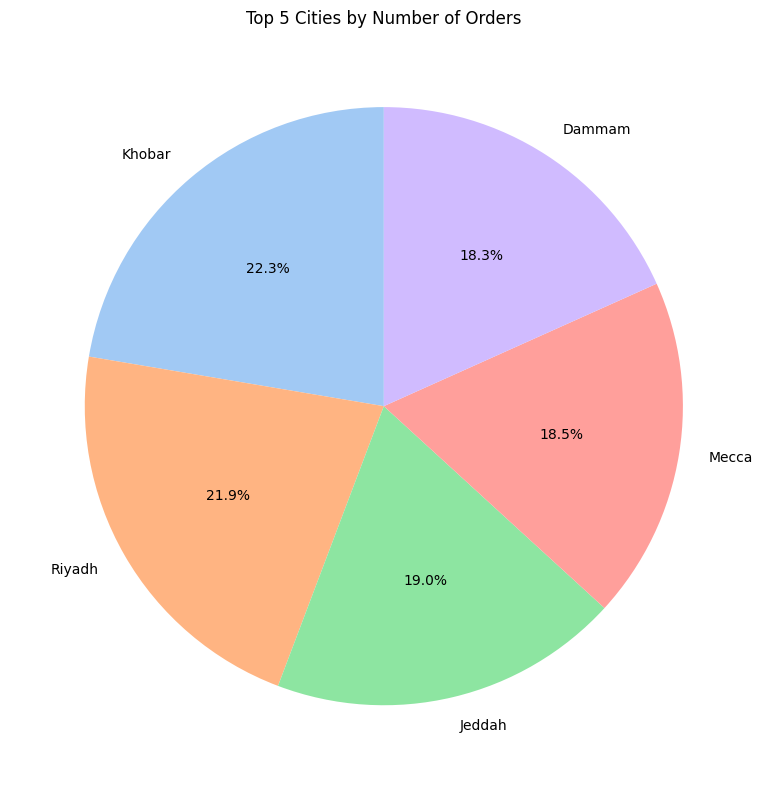

In [74]:
plt.figure(figsize=(8, 8))
top_cities.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Top 5 Cities by Number of Orders")
plt.ylabel("")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

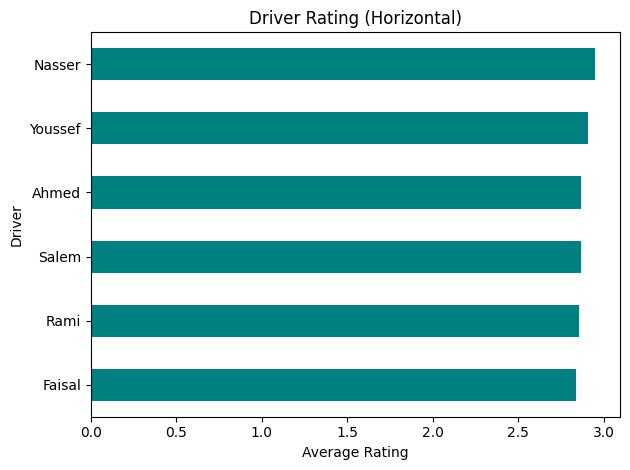

In [75]:
plt.figure(figsize=(10, 6))
driver_perf.sort_values(by='driver_rating').plot(kind='barh', y='driver_rating', color='teal', legend=False)
plt.title("Driver Rating (Horizontal)")
plt.xlabel("Average Rating")
plt.ylabel("Driver")
plt.tight_layout()
plt.show()

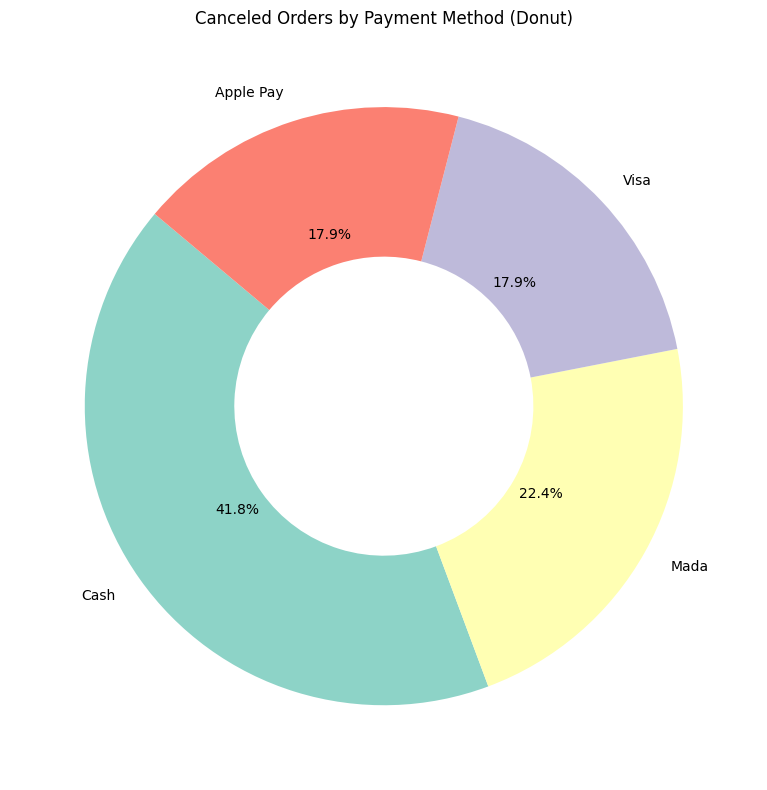

In [76]:
plt.figure(figsize=(8, 8))
plt.pie(cancel_by_payment.values, labels=cancel_by_payment.index, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(width=0.5), colors=sns.color_palette("Set3"))
plt.title("Canceled Orders by Payment Method (Donut)")
plt.tight_layout()
plt.show()

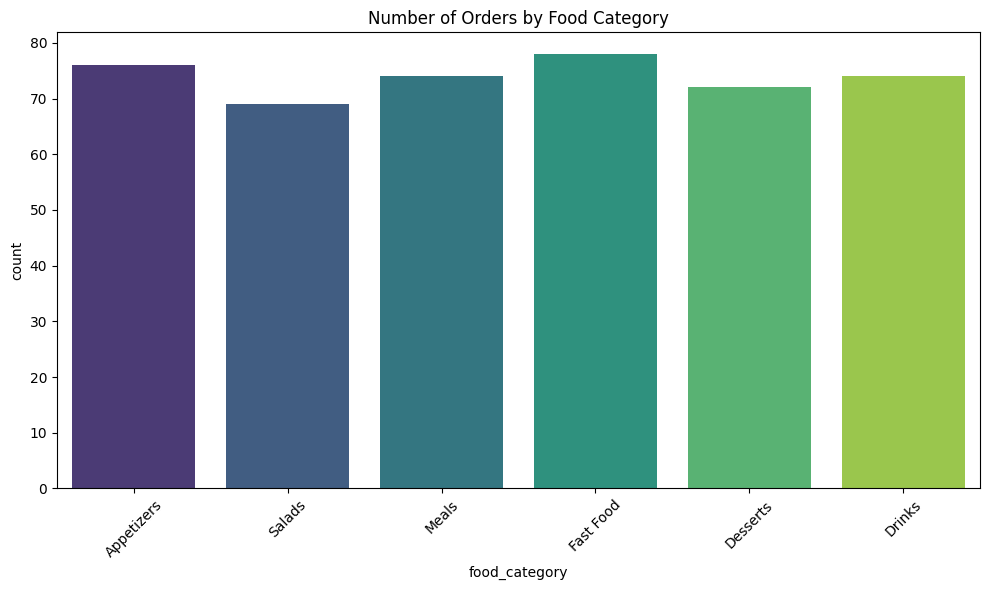

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='food_category', hue='food_category', palette='viridis', legend=False)
plt.title("Number of Orders by Food Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

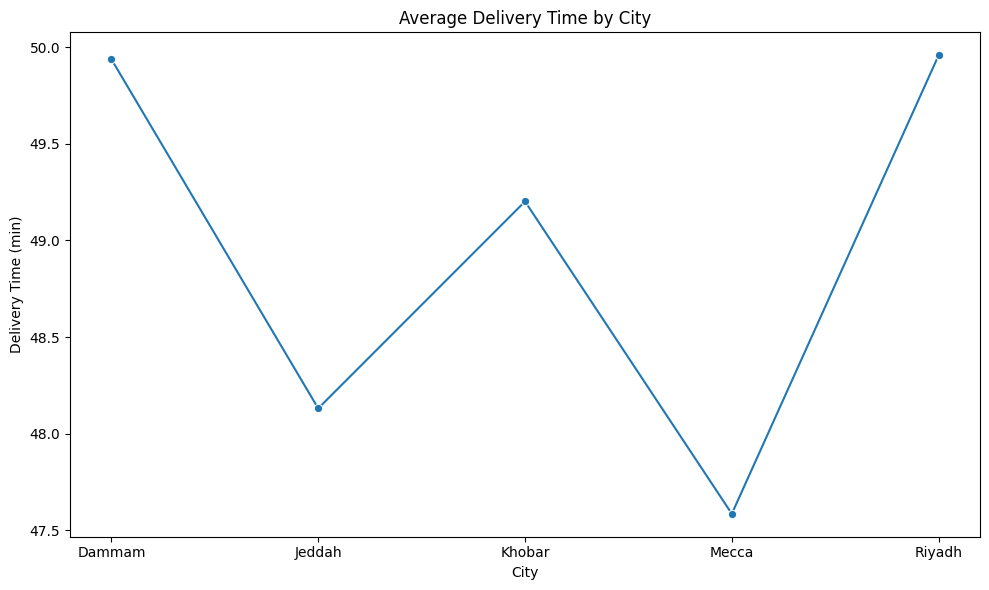

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=delivery_by_city.index, y=delivery_by_city.values, marker='o')
plt.title("Average Delivery Time by City")
plt.ylabel("Delivery Time (min)")
plt.xlabel("City")
plt.tight_layout()
plt.show()

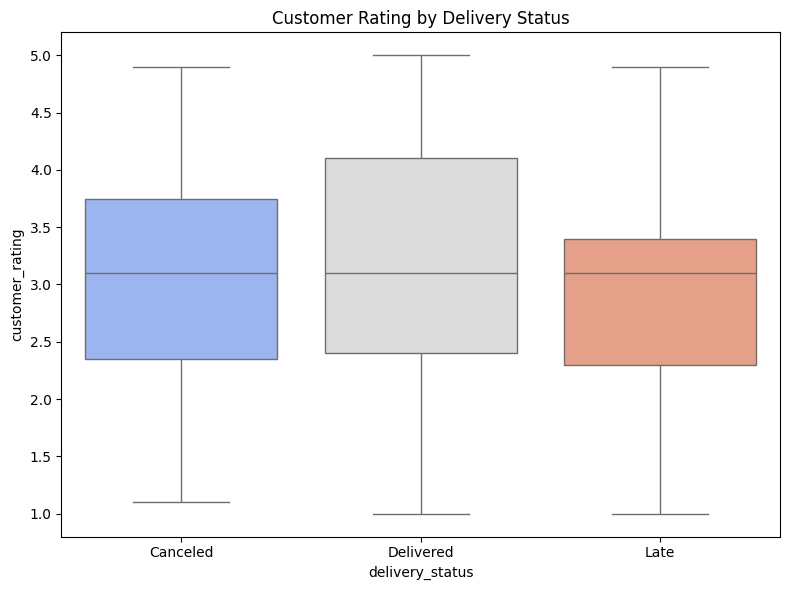

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='delivery_status', y='customer_rating', hue='delivery_status', palette='coolwarm', legend=False)
plt.title("Customer Rating by Delivery Status")
plt.tight_layout()
plt.show()

In [94]:
df_model_full = df[['order_amount', 'delivery_time_min', 'customer_city',
                    'food_category', 'restaurant_name', 'payment_method',
                    'customer_rating']].dropna()

X = df_model_full.drop('customer_rating', axis=1)
y = df_model_full['customer_rating']

categorical_cols = ['customer_city', 'food_category', 'restaurant_name', 'payment_method']

# Initialize ColumnTransformer with necessary imports
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Initialize Pipeline with necessary imports
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split data using train_test_split with necessary imports
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Calculate metrics with necessary imports
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

rmse, r2

(1.146865974392122, -0.29032025392908367)

In [95]:
y_train_pred = pipeline.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = rmse
test_r2 = r2

print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Train RMSE: 0.45262870537288746
Train R²: 0.8450317164781413
Test RMSE: 1.146865974392122
Test R²: -0.29032025392908367


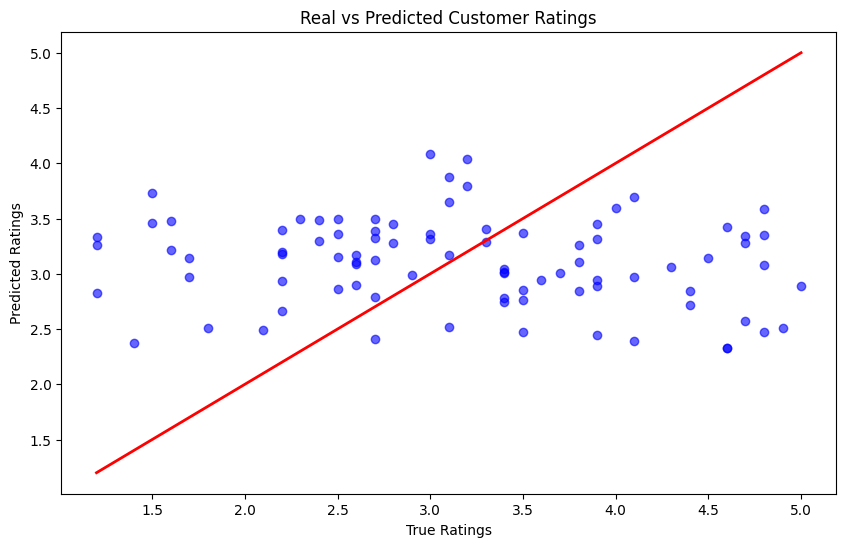

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # خط العينة المثالية
plt.title('Real vs Predicted Customer Ratings')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

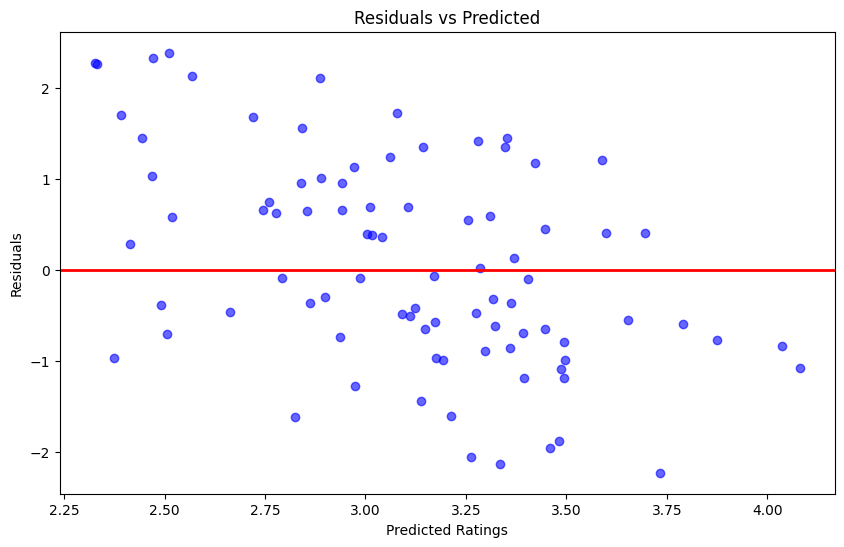

In [100]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', lw=2)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.show()

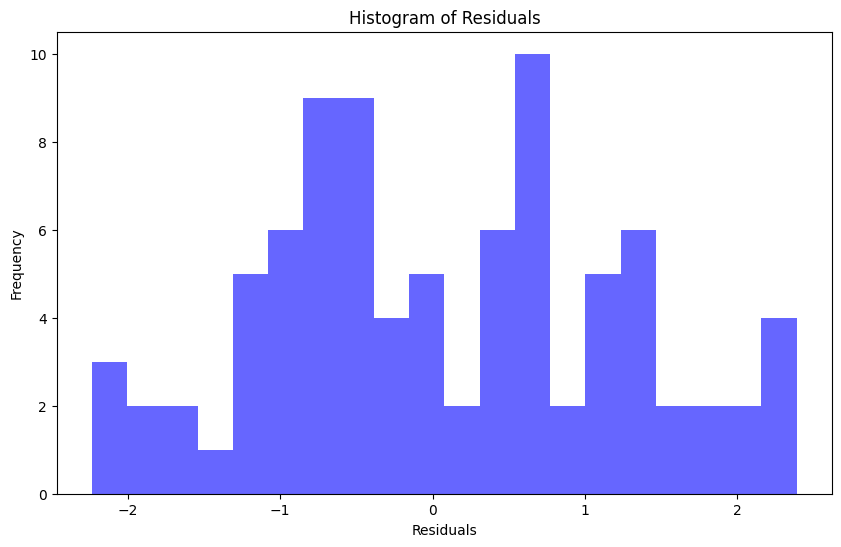

In [101]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.6)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

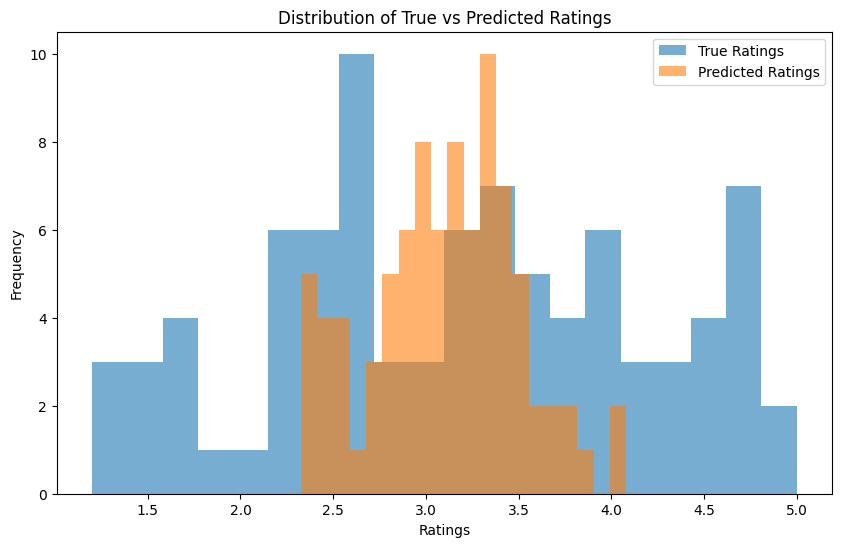

In [102]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.6, label='True Ratings')
plt.hist(y_pred, bins=20, alpha=0.6, label='Predicted Ratings')
plt.title('Distribution of True vs Predicted Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [106]:
import joblib
joblib. dump (pipeline, 'food_delivery_en.pkl')

['food_delivery_en.pkl']